In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split

In [2]:
t = pd.read_csv('cars.csv')
t

Car       Model  Volume  Weight  CO2
0       Toyoty        Aygo    1000     790   99
1   Mitsubishi  Space Star    1200    1160   95
2        Skoda      Citigo    1000     929   95
3         Fiat         500     900     865   90
4         Mini      Cooper    1500    1140  105
5           VW         Up!    1000     929  105
6        Skoda       Fabia    1400    1109   90
7     Mercedes     A-Class    1500    1365   92
8         Ford      Fiesta    1500    1112   98
9         Audi          A1    1600    1150   99
10     Hyundai         I20    1100     980   99
11      Suzuki       Swift    1300     990  101
12        Ford      Fiesta    1000    1112   99
13       Honda       Civic    1600    1252   94
14      Hundai         I30    1600    1326   97
15        Opel       Astra    1600    1330   97
16         BMW           1    1600    1365   99
17       Mazda           3    2200    1280  104
18       Skoda       Rapid    1600    1119  104
19        Ford       Focus    2000    1328  105
20        Ford      Mondeo    1600    1584   94
21        Opel    Insignia    2000    1428   99
22    Mercedes     C-Class    2100    1365   99
23       Skoda     Octavia    1600    1415   99
24       Volvo         S60    2000    1415   99
25    Mercedes         CLA    1500    1465  102
26        Audi          A4    2000    1490  104
27        Audi          A6    2000    1725  114
28       Volvo         V70    1600    1523  109
29         BMW           5    2000    1705  114
30    Mercedes     E-Class    2100    1605  115
31       Volvo        XC70    2000    1746  117
32        Ford       B-Max    1600    1235  104
33         BMW         216    1600    1390  108
34        Opel      Zafira    1600    1405  109
35    Mercedes         SLK    2500    1395  120

In [4]:
t.describe()

Volume       Weight         CO2
count    36.000000    36.000000   36.000000
mean   1611.111111  1292.277778  102.027778
std     388.975047   242.123889    7.454571
min     900.000000   790.000000   90.000000
25%    1475.000000  1117.250000   97.750000
50%    1600.000000  1329.000000   99.000000
75%    2000.000000  1418.250000  105.000000
max    2500.000000  1746.000000  120.000000

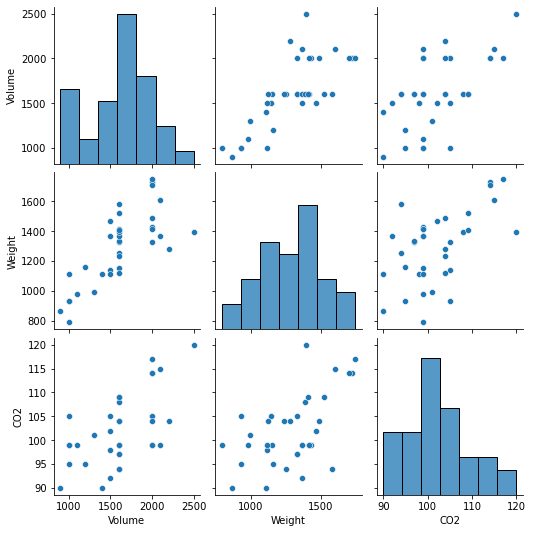

In [5]:
sn.pairplot(t)

In [6]:
t.corr()

Volume    Weight       CO2
Volume  1.000000  0.753537  0.592082
Weight  0.753537  1.000000  0.552150
CO2     0.592082  0.552150  1.000000

<AxesSubplot:>

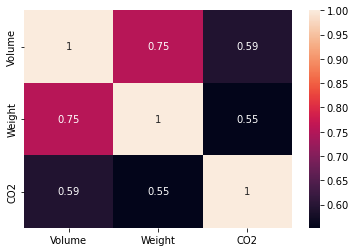

In [7]:
sn.heatmap(t.corr(), annot = True)

In [13]:
#seperate depwndent and independent variables
x = t[['Volume', 'Weight']]#.to_numpy().reshape(-1,1)
y = t['CO2']#.to_numpy().reshape(-1,1)

In [14]:
x_train, x_test, y_train, y_test, = train_test_split(x,y, train_size = 0.75, random_state = 123)
x_train.shape

(27, 2)

In [15]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [16]:
model.intercept_

79.1993381882048

In [17]:
model.coef_

array([0.00984995, 0.00517573])

In [18]:
y_pred = model.predict(x_test)
y_pred

array([ 98.729161  ,  99.72968365, 101.43928154,  97.12825348,
        93.85754747, 101.3512941 , 102.2829258 , 107.93607481,
        94.80470636])

In [20]:
# We can also test the model using a user-supplied input.
vol = float(input("Enter a car's  engine volume to predict CO2 emission: "))
wt = float(input("Enter a car's weight to predict CO2 emission: "))
#m = pd.DataFrame([vol, wt])
L = [vol,wt]
data = pd.DataFrame([L], columns =['Volume', 'Weight'])
print ("Predicted CO2 emission is: ", model.predict(data) )

Enter a car's  engine volume to predict CO2 emission: 88
Enter a car's weight to predict CO2 emission: 77
Predicted CO2 emission is:  [80.46466553]


[Text(0, 0.5, 'CO2 emission'), Text(0.5, 0, 'Features (Weight, Volume) ')]

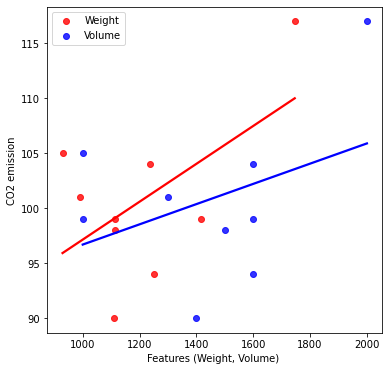

In [21]:
# plot multiple regression plots using seaborn's regplot()
fig, ax = plt.subplots(figsize=(6, 6))
sn.regplot(x=x_test['Weight'], y=y_test, ci=None, color ='red',  label='Weight')
sn.regplot(x=x_test['Volume'], y=y_test, ci=None, color ='blue', label='Volume')
plt.legend()
ax.set(ylabel='CO2 emission', xlabel='Features (Weight, Volume) ')

In [22]:
# R2 value
print("Model Performance: ", model.score(x_test, y_test))
print ("MSE: ", mean_squared_error(y_test, y_pred))
print ("MAE: ", mean_absolute_error(y_test, y_pred))
print ("Root MSE: ", sqrt(mean_squared_error(y_test, y_pred)) )

Model Performance:  0.16325214116248354
MSE:  43.469567777632946
MAE:  5.789241752692519
Root MSE:  6.593145514671502
